In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

In [3]:
import os
import sys

In [4]:
# chaging directory

In [5]:
root, *_ = !pwd

In [6]:
if root.endswith('notebooks'):
    os.chdir('../')
    root, *_ = !pwd
    sys.path.append('src/')

In [7]:
os.getcwd()

'/home/med/projects/competitions/mlb-kaggle'

In [8]:
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
RAW_PATH = Path(os.environ['RAW_PATH'])

In [10]:
PROCESSED_PATH = Path(os.environ['ROOT_DIR']) / 'processed'

In [11]:
os.listdir(RAW_PATH)

['seasons.csv',
 'teams.csv',
 'example_sample_submission.csv',
 'train.csv',
 'mlb-player-digital-engagement-forecasting.zip',
 'awards.csv',
 'players.csv',
 'example_test.csv',
 'mlb']

In [12]:
os.listdir(PROCESSED_PATH)

['target.csv', 'raw_data.csv']

In [13]:
df = pd.read_csv(PROCESSED_PATH / 'raw_data.csv',
                 parse_dates=['date', 'mlbDebutDate', 'DOB'])

/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
df

,playerId,target1,target2,target3,target4,date,target_avg,battingOrder,gamesPlayedBatting,flyOuts,...,inSeason,seasonPart,DOB,mlbDebutDate,birthCountry,weight,primaryPositionName,player_in_test,height,playerBMI
0,112526,0.055277,5.496109,0.025839,16.176471,2018-01-01,5.438424,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
1,112526,0.060625,3.252914,0.030486,8.541353,2018-01-02,2.971345,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
2,112526,0.029341,1.648352,0.032613,10.490112,2018-01-03,3.050104,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
3,112526,0.014799,2.665894,0.087422,19.091467,2018-01-04,5.464896,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
4,112526,0.083916,1.161002,0.024759,6.643880,2018-01-05,1.978389,NaN,NaN,NaN,...,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,False,1.8034,39.748992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506171,685503,0.044617,1.224728,0.009437,0.737463,2021-04-26,0.504062,NaN,NaN,NaN,...,True,Reg Season 1st Half,1992-08-11,2021-04-03,Japan,95.25432,Pitcher,True,1.8796,26.962106
2506172,685503,0.019123,1.178880,0.013161,0.790301,2021-04-27,0.500366,NaN,NaN,NaN,...,True,Reg Season 1st Half,1992-08-11,2021-04-03,Japan,95.25432,Pitcher,True,1.8796,26.962106
2506173,685503,0.015799,4.323489,0.002350,0.970273,2021-04-28,1.327977,NaN,NaN,NaN,...,True,Reg Season 1st Half,1992-08-11,2021-04-03,Japan,95.25432,Pitcher,True,1.8796,26.962106
2506174,685503,0.018770,31.946021,0.305491,5.938273,2021-04-29,9.552139,NaN,NaN,NaN,...,True,Reg Season 1st Half,1992-08-11,2021-04-03,Japan,95.25432,Pitcher,True,1.8796,26.962106


### players data

In [15]:
# not all players are in the private test set
# the players in the test set are saved in the players.csv file

In [16]:
_players = pd.read_csv(RAW_PATH / 'players.csv')

In [17]:
_players['playerForTestSetAndFuturePreds'].fillna(False, inplace=True)

In [18]:
player_in_test = _players.query('playerForTestSetAndFuturePreds')['playerId']

In [19]:
# player_in_test holds only the players in the test set

### filter players

In [20]:
from data.util import filter_by_date, filter_by_id

In [21]:
# filter only test players
df = filter_by_id(df, player_in_test)

In [22]:
# if you want to run on a sample,
# change sample_size to the number of players in the sample
sample_size = None

In [23]:
if sample_size is not None and sample_size > 0:
    playerList = df.groupby(['playerId'])['target_avg'].std().sort_values(ascending=False).reset_index()
    df = filter_by_id(df, playerList['playerId'].head(sample_size))

In [24]:
df.playerId.nunique()

1187

In [25]:
# player stats

In [26]:
df.head()

,playerId,target1,target2,target3,target4,date,target_avg,battingOrder,gamesPlayedBatting,flyOuts,...,inSeason,seasonPart,DOB,mlbDebutDate,birthCountry,weight,primaryPositionName,player_in_test,height,playerBMI
0,405395,0.151872,21.449416,0.112952,22.990196,2018-01-01,11.176109,NaN,NaN,NaN,...,False,Offseason,1980-01-16,2001-04-02,Dominican Republic,106.59412,First Base,True,1.905,29.372661
1,405395,0.136406,10.978585,0.096403,15.669173,2018-01-02,6.720142,NaN,NaN,NaN,...,False,Offseason,1980-01-16,2001-04-02,Dominican Republic,106.59412,First Base,True,1.905,29.372661
2,405395,0.064460,9.226190,0.101464,23.172829,2018-01-03,8.141236,NaN,NaN,NaN,...,False,Offseason,1980-01-16,2001-04-02,Dominican Republic,106.59412,First Base,True,1.905,29.372661
3,405395,0.024217,10.170965,0.102448,35.359116,2018-01-04,11.414186,NaN,NaN,NaN,...,False,Offseason,1980-01-16,2001-04-02,Dominican Republic,106.59412,First Base,True,1.905,29.372661
4,405395,0.157556,4.294307,0.046517,12.347789,2018-01-05,4.211542,NaN,NaN,NaN,...,False,Offseason,1980-01-16,2001-04-02,Dominican Republic,106.59412,First Base,True,1.905,29.372661


In [27]:
df.columns

Index(['playerId', 'target1', 'target2', 'target3', 'target4', 'date',
       'target_avg', 'battingOrder', 'gamesPlayedBatting', 'flyOuts',
       'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns',
       'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch',
       'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPi

### preprocessing with pipelines

In [28]:
from typing import List
def forward_fill(df: pd.DataFrame, features: List[str],
                 on='playerId',
                 limit: int =None):
    ffilled_df = df.groupby(on)[features].ffill(limit=limit)
    df.loc[:, features] = ffilled_df
    return df

In [29]:
def gen_hardcoded_features(df: pd.DataFrame):
    # some feature eng for the dates
    df['playerAge'] = (df['date'] - df['DOB']).dt.total_seconds()
    df['playerTSinceDebut'] = (df['date'] - df['mlbDebutDate']).dt.total_seconds()
    df['playerDebutAge'] = (df['mlbDebutDate'] - df['DOB']).dt.total_seconds()
    df['rostersTime'] = (df['date'] - pd.to_datetime(df['rosterDate'])).dt.total_seconds()
    df['rostersTime'] /= 60 * 60 * 24
    # normalize
    df[['playerAge', 'playerTSinceDebut', 'playerDebutAge']] /= 60 * 60 * 24 * 365
    df['AwardWinner'] = df['awardId'].isna().astype(np.float32)
    return df

In [30]:
def fillna(df: pd.DataFrame, fill_value=-1):
    return df.fillna(-1)

In [31]:
from pipeline.core import FunctionTransformer, Pipeline, PdColumnTransformer, PdFeatureUnion
from pipeline.continuous import PdScaleNorm, FilterContinuousFeatures, MedianFillNaN
from pipeline.stats import StatisticGen, LagGen, FeaturesTable
from pipeline.categories import Categorify
from pipeline.season import join_season_info
from pipeline.players import join_players_info

In [32]:
# transformer for filling nan values with past valid values
# transformer for generating some hardcoded features
fill_forward_tmf = FunctionTransformer(forward_fill, kw_args={'features':['numberOfFollowers',
                                                                        'teamFollowers',
                                                                        'status',
                                                                        'teamId', 'rosterDate']})
join_players_tmf = FunctionTransformer(join_players_info, kw_args={'path_to_players': RAW_PATH / 'players.csv'})
harcoded_feat_tmf = FunctionTransformer(gen_hardcoded_features)

In [33]:
# creating pipeline
ffill_and_gen_harcoded_feat = Pipeline([('fill_forward', fill_forward_tmf),
                                       ('hardcoded_feat', harcoded_feat_tmf)])

In [34]:
# features to use for target preprocessing
target_cols = ['target1', 'target2', 'target3', 'target4']
index_cols = ['date', 'playerId']
pp_cols = target_cols + index_cols

In [94]:
# categories encoding
categories = ['playerId', 'seasonPart', 'year', 'primaryPositionName',
              'status', 'teamId', 'awardId']

categories_tmf = PdColumnTransformer([(category, Categorify(add_nan=True), category)
                                       for category in categories])

In [95]:
# for the statistics, we will compute them and then resuse them
stats_gen_tmf = StatisticGen(stats=['mean', 'median', 'std'], windows=[90], drop_index=False)
target_stats_tmf = PdColumnTransformer([('gen_stats', stats_gen_tmf, pp_cols)])
target_stats_table = target_stats_tmf.fit_transform(df)


In [96]:
target_stats_table.head()

,playerId,date,target1__mean__90d,target1__median__90d,target1__std__90d,target2__mean__90d,target2__median__90d,target2__std__90d,target3__mean__90d,target3__median__90d,target3__std__90d,target4__mean__90d,target4__median__90d,target4__std__90d
0,405395,2018-01-01,0.151872,0.151872,NaN,21.449417,21.449417,NaN,0.112952,0.112952,NaN,22.990196,22.990196,NaN
1,405395,2018-01-02,0.144139,0.144139,0.010936,16.214001,16.214001,7.403996,0.104677,0.104677,0.011702,19.329685,19.329685,5.176745
2,405395,2018-01-03,0.117580,0.136406,0.046648,13.884731,10.978585,6.609545,0.103606,0.101464,0.008480,20.610733,22.990196,4.280490
3,405395,2018-01-04,0.094239,0.100433,0.060248,12.956289,10.574776,5.707194,0.103317,0.101956,0.006948,24.297829,23.081512,8.160501
4,405395,2018-01-05,0.106902,0.136406,0.059365,11.223893,10.170965,6.279732,0.091957,0.101464,0.026104,21.907820,22.990196,8.860362


In [97]:
## merge computed statistics
reuse_computed_stats = Pipeline([('merge_stats', FeaturesTable(target_stats_table, lags=[60], clip_max=True)),
                                 ('fillnan', FunctionTransformer(fillna)),
                                 ('normalize', PdScaleNorm())])

In [98]:
# for continuous features, we will filter them and then fill nan values and normalize them

median_fillnan_columns = ['numberOfFollowers', 'teamFollowers',
                          'playerDebutAge', 'playerAge', 'playerTSinceDebut']
fillnan_median_tmf = MedianFillNaN(median_fillnan_columns)

# get the rest of the continuous features
continuous_feat_tmf = Pipeline([('get_cont_feat', FilterContinuousFeatures()),
                                ('fillnan_median', fillnan_median_tmf),
                                ('fillnan', FunctionTransformer(fillna)),
                                ('normalize', PdScaleNorm())
                               ])

In [99]:
# putting all features generation steps together
all_features_tmf = PdFeatureUnion([('stats', reuse_computed_stats), 
                                   ('cont_feat', continuous_feat_tmf), 
                                  ('cats', categories_tmf),
                                  ])

In [100]:
# main pipeline with all steps 
pipeline = Pipeline([('core_features', ffill_and_gen_harcoded_feat),
                     ('features_generation', all_features_tmf)])

In [101]:
pipeline

Pipeline(steps=[('core_features',
                 Pipeline(steps=[('fill_forward',
                                  FunctionTransformer(func=<function forward_fill at 0x7f65323ab280>,
                                                      kw_args={'features': ['numberOfFollowers',
                                                                            'teamFollowers',
                                                                            'status',
                                                                            'teamId',
                                                                            'rosterDate']})),
                                 ('hardcoded_feat',
                                  FunctionTransformer(func=<function gen_hardcoded_features at 0x7f653377eb80>))])),
                ('features_generation',
                 PdFeature...
                                                   PdColumnTransformer(transformers=[('playerId',
                     

In [102]:
from data.split import SplitData

In [103]:
# split the data on 2021-03-01 with a valid ds of 61 days
sp = SplitData("2021-03-01", test_days=61)

In [104]:
train_idx = sp.train_idx(df)
valid_idx = sp.valid_idx(df)

In [105]:
%%time
# train the pipeline only with the train dataset
pipeline.fit(sp.filter(df, train_idx))

CPU times: user 8.15 s, sys: 1.39 s, total: 9.54 s
Wall time: 9.58 s


Pipeline(steps=[('core_features',
                 Pipeline(steps=[('fill_forward',
                                  FunctionTransformer(func=<function forward_fill at 0x7f65323ab280>,
                                                      kw_args={'features': ['numberOfFollowers',
                                                                            'teamFollowers',
                                                                            'status',
                                                                            'teamId',
                                                                            'rosterDate']})),
                                 ('hardcoded_feat',
                                  FunctionTransformer(func=<function gen_hardcoded_features at 0x7f653377eb80>))])),
                ('features_generation',
                 PdFeature...
                                                   PdColumnTransformer(transformers=[('playerId',
                     

In [106]:
%%time
# transform all dataset
features = pipeline.transform(df)

CPU times: user 3.33 s, sys: 1.93 s, total: 5.26 s
Wall time: 5.32 s


In [107]:
pd.options.display.max_rows = 100
features.T.head(100)

,0,1,2,3,4,5,6,7,8,9,...,1443382,1443383,1443384,1443385,1443386,1443387,1443388,1443389,1443390,1443391
target1__mean__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.010039
target1__median__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901
target1__std__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013988,0.013988,0.013988,0.013988,0.013988,0.013988,0.013988,0.013988,0.013988,0.015834
target2__mean__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.034109,0.034958,0.035451,0.036231,0.037068,0.037560,0.038146,0.038372,0.039265,0.043983
target2__median__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016995,0.017435,0.018050,0.019155,0.019931,0.020055,0.020147,0.020199,0.020360,0.020619
target2__std__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142368,0.142652,0.142614,0.142790,0.143131,0.143067,0.143045,0.142944,0.143191,0.162586
target3__mean__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011419,0.011553,0.011627,0.011647,0.011654,0.011662,0.011668,0.011678,0.011679,0.012058
target3__median__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901
target3__std__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.031189,0.031322,0.031348,0.031345,0.031343,0.031340,0.031338,0.031335,0.031335,0.032552
target4__mean__90d__60lag,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024905,0.024900,0.024930,0.024809,0.024600,0.024678,0.024702,0.024691,0.024689,0.024862


In [108]:

# change the dtypes of the target (pytorch likes float32 and not float64)
df[target_cols] = df[target_cols].astype(np.float32)

In [109]:
train_idx.shape

(1443392,)

In [110]:
train_idx.shape

(1443392,)

In [111]:
train_data = sp.filter(features, train_idx)

raw_train_df = sp.filter(df, train_idx)

In [112]:
valid_data = sp.filter(features, valid_idx)
raw_valid_df = sp.filter(df, valid_idx)

In [113]:
train_data.shape, raw_train_df.shape

((1370985, 101), (1370985, 102))

In [114]:
valid_data.shape, raw_valid_df.shape

((72407, 101), (72407, 102))

In [115]:
# add the target to features ds
train_data[target_cols + ['date']] = raw_train_df[target_cols + ['date']]
valid_data[target_cols + ['date']] = raw_valid_df[target_cols + ['date']]

### modeling 

In [116]:
# # filter continuous features
continuous_feat = features.columns.drop(categories)

In [117]:
features_list = list(continuous_feat) + categories

In [118]:
features_list

['target1__mean__90d__60lag',
 'target1__median__90d__60lag',
 'target1__std__90d__60lag',
 'target2__mean__90d__60lag',
 'target2__median__90d__60lag',
 'target2__std__90d__60lag',
 'target3__mean__90d__60lag',
 'target3__median__90d__60lag',
 'target3__std__90d__60lag',
 'target4__mean__90d__60lag',
 'target4__median__90d__60lag',
 'target4__std__90d__60lag',
 'battingOrder',
 'gamesPlayedBatting',
 'flyOuts',
 'groundOuts',
 'runsScored',
 'doubles',
 'triples',
 'homeRuns',
 'strikeOuts',
 'baseOnBalls',
 'intentionalWalks',
 'hits',
 'hitByPitch',
 'atBats',
 'caughtStealing',
 'stolenBases',
 'groundIntoDoublePlay',
 'groundIntoTriplePlay',
 'plateAppearances',
 'totalBases',
 'rbi',
 'leftOnBase',
 'sacBunts',
 'sacFlies',
 'catchersInterference',
 'pickoffs',
 'gamesPlayedPitching',
 'gamesStartedPitching',
 'completeGamesPitching',
 'shutoutsPitching',
 'winsPitching',
 'lossesPitching',
 'flyOutsPitching',
 'airOutsPitching',
 'groundOutsPitching',
 'runsPitching',
 'doublesP

In [119]:
from omegaconf import OmegaConf

parameters = {
 'objective':'mae',
 'reg_alpha': 0.1,
 'reg_lambda': 0.1, 
 'n_estimators': 100000,
 'learning_rate': 0.1,
 'random_state': 42,
}
config = {'hp': parameters,
          'features': features_list,
          'categories': categories,
          'target_cols': target_cols}
config = OmegaConf.create(config)

In [120]:
config

{'hp': {'objective': 'mae', 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'n_estimators': 100000, 'learning_rate': 0.1, 'random_state': 42}, 'features': ['target1__mean__90d__60lag', 'target1__median__90d__60lag', 'target1__std__90d__60lag', 'target2__mean__90d__60lag', 'target2__median__90d__60lag', 'target2__std__90d__60lag', 'target3__mean__90d__60lag', 'target3__median__90d__60lag', 'target3__std__90d__60lag', 'target4__mean__90d__60lag', 'target4__median__90d__60lag', 'target4__std__90d__60lag', 'battingOrder', 'gamesPlayedBatting', 'flyOuts', 'groundOuts', 'runsScored', 'doubles', 'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch', 'atBats', 'caughtStealing', 'stolenBases', 'groundIntoDoublePlay', 'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi', 'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference', 'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching', 'completeGamesPitching', 'shutoutsPitching', 'winsPitching', 'losses

In [121]:
from train.lgbm import run_lgbm

In [122]:
# models are train with a run_fn, the run_fn return and ModelOutput (src/train/core.py)
# ModelOutput holds the trained models, a predict_fn to predict new data and
# the predictions of the validation set 

In [123]:
lgbm_output = run_lgbm(config, train_data, valid_data)

target1


/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['awardId', 'playerId', 'primaryPositionName', 'seasonPart', 'status', 'teamId', 'year']
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1.38938
[200]	valid_0's l1: 1.38512
[300]	valid_0's l1: 1.38306
[400]	valid_0's l1: 1.3813
[500]	valid_0's l1: 1.38096
[600]	valid_0's l1: 1.38118
Early stopping, best iteration is:
[507]	valid_0's l1: 1.38095
target2
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 3.00611
[200]	valid_0's l1: 2.99782
[300]	valid_0's l1: 2.99808
Early stopping, best iteration is:
[223]	valid_0's l1: 2.99558
target3
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1.23565
[200]	valid_0's l1: 1.23495
[300]	valid_0's l1: 1.23667
Early stopping, best iteration is:
[204]	valid_0's l1: 1.23481
target4
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 1.91181
[200]	valid_0's l1: 1.8911
[300]	valid_0's l1: 1.88191
[400]	valid_0's l1: 1.87374
[500]	valid_0's l1: 1.87282
[600]	valid_0's l1: 1.87008
[700]	valid_0's l1: 1.86668
[800]	val

In [124]:
from evaluate.metrics import compute_metrics

In [125]:
valid_test_prediction = pd.DataFrame(lgbm_output.prediction, columns=['yhat1', 'yhat2', 'yhat3', 'yhat4'])

valid_test_prediction[pp_cols] = raw_valid_df[pp_cols]

In [126]:
is_test_pred = valid_test_prediction['date'] >= '2021-04-01'

valid_prediction, test_prediction = (valid_test_prediction.loc[~is_test_pred, :],
                                     valid_test_prediction.loc[is_test_pred, :])

In [135]:
# metrics from 2021-03-01 up to 2021-04-30
compute_metrics(valid_test_prediction)

{'mae_mean': 1.866038954440292,
 'mae_1': 1.380952314996537,
 'mae_2': 2.9955834269416495,
 'mae_3': 1.2348125333887798,
 'mae_4': 1.852807542434202}

In [136]:
# metrics from 2021-03-01 up to 2021-03-31
compute_metrics(valid_prediction)

{'mae_mean': 2.16788699643985,
 'mae_1': 1.5191756697075072,
 'mae_2': 3.576570233316476,
 'mae_3': 1.4991846154234896,
 'mae_4': 2.0766174673119258}

In [137]:
# metrics from 2021-04-01 up to 2021-04-30
compute_metrics(test_prediction)

{'mae_mean': 1.5541293110407495,
 'mae_1': 1.2381215151285343,
 'mae_2': 2.3952303936876627,
 'mae_3': 0.9616280486195802,
 'mae_4': 1.6215372867272206}

In [84]:
def plot_pred(df, playerId, index=1):
    pdf = df.query(f'playerId == {playerId}')
    
    f, ax = plt.subplots(1, 1, figsize=(20, 5))
    
    tname = f'target{index}'
    yhat_name = f'yhat{index}'
    
    ax.plot('date', tname, '-o', data=pdf, label=tname)
    ax.plot('date', yhat_name, '-o', data=pdf, label=tname)
    
    ax.legend()
    

In [128]:
def feature_importance(features, model):
    fi = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    fi.sort_values(by='importance', ascending=False, inplace=True)
    return fi

def compute_fi(features, models):
    fi = [feature_importance(features, _model).assign(target=f'target{target+1}')
      for target, _model in enumerate(models)]
    fi = pd.concat(fi)
    fi = fi.pivot('feature', 'target', 'importance')
    fi = fi * 100 / fi.sum()
    fi['mean'] = fi.mean(axis=1)
    fi.sort_values(by='mean', ascending=False, inplace=True)
    return fi

In [129]:
len(features_list)

101

In [130]:
lgbm_output.model[0].feature_importances_.shape

(101,)

In [131]:
fi = compute_fi(features_list, lgbm_output.model)

In [132]:
fi.head(100)

target,target1,target2,target3,target4,mean
feature,,,,,
playerId,66.002630,55.201794,66.732026,62.409740,62.586547
seasonPart,12.176200,11.360239,6.715686,8.591520,9.710911
playerTSinceDebut,1.157133,4.947683,1.143791,4.878254,3.031715
teamId,5.115056,2.197309,2.483660,0.442905,2.559733
year,0.624589,4.738416,2.549020,2.233417,2.536360
rostersTime,0.775805,1.943199,3.333333,3.490764,2.385775
status,5.075608,1.674141,1.176471,0.312762,2.059745
target3__mean__90d__60lag,0.026298,0.104634,6.503268,1.565911,2.050028
target2__std__90d__60lag,0.118343,4.678625,0.833333,2.246012,1.969078


In [133]:
worst_players = (valid_test_prediction.groupby('playerId')
                 .apply(lambda x: pd.Series(compute_metrics(x)))
                 .sort_values(by='mae_mean', ascending=False))

worst_players.head(10)

,mae_mean,mae_1,mae_2,mae_3,mae_4
playerId,,,,,
660271,30.195569,26.237852,36.294644,29.741951,28.507830
665487,22.322050,23.207423,8.705209,25.959084,31.416482
596019,18.834879,20.406327,15.442209,17.142898,22.348082
545361,17.508732,13.173416,12.338183,12.577251,31.946076
594798,16.766157,11.268421,21.886444,14.454187,19.455575
545333,15.945994,13.488226,16.798800,8.428976,25.067974
660670,14.738805,20.954897,11.974294,16.351386,9.674644
543037,13.236083,13.668721,14.363428,14.303750,10.608434
592626,13.102243,14.025567,19.916376,5.703741,12.763287


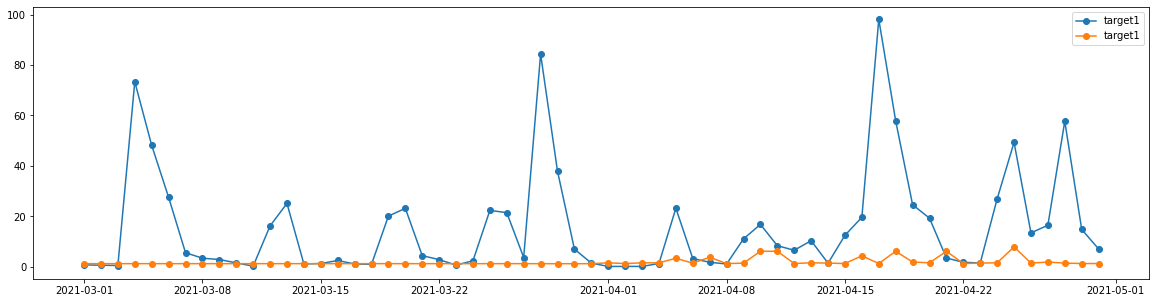

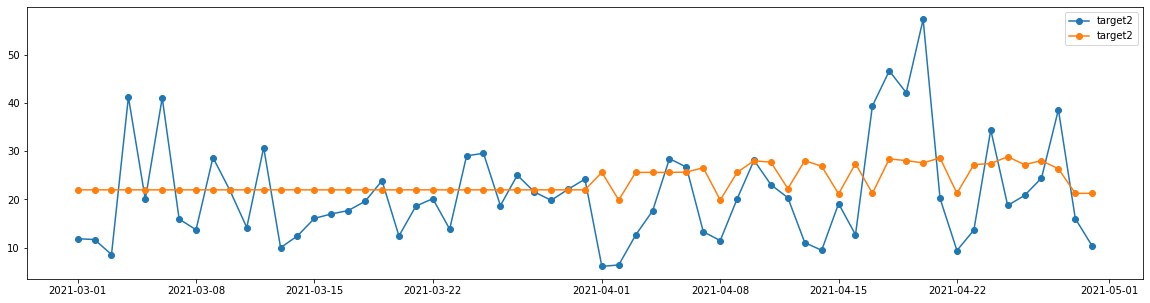

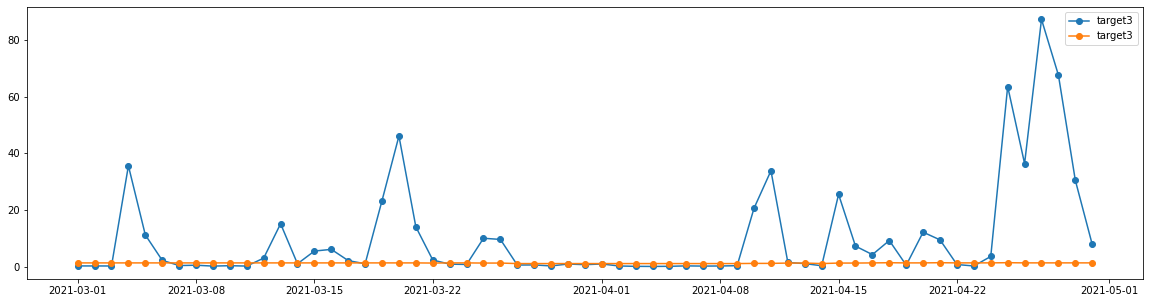

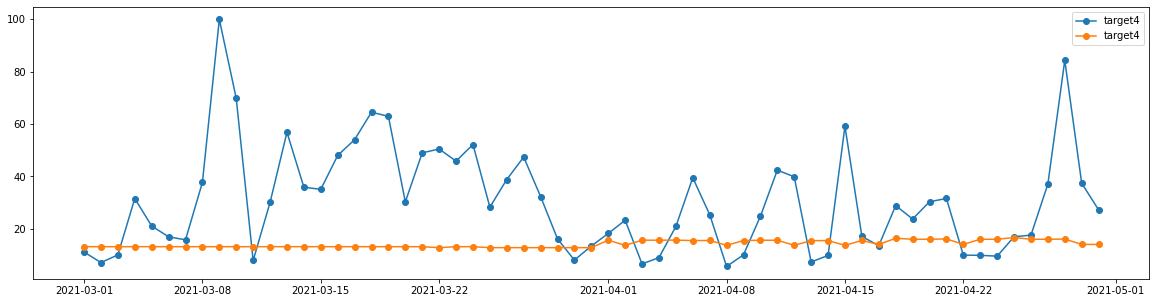

In [134]:
for index in range(1, 5):
    plot_pred(valid_test_prediction, playerId=547180, index=index)